# Сложные задачи визуализации

## Напряженность электрического поля и эквипотенциали

/home/konst/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: The following kwargs were not used by contour: 'linestyle'


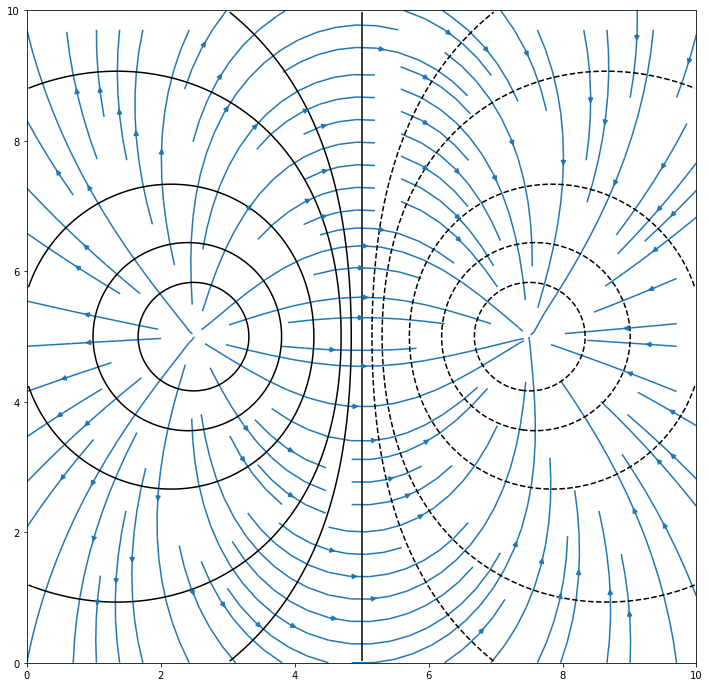

In [1]:
# Electric potential visualization
from numpy import linspace, array, sqrt, zeros, logspace, append, meshgrid, empty, gradient
from pylab import show, contour, contourf, savefig, quiver, figure, streamplot

Nx = 200
Ny = 200
xmin = 0.
xmax = 10.
ymin = 0.
ymax = 10.
x = linspace(xmin, xmax, Nx)
y = linspace(ymin, ymax, Ny)
X, Y = meshgrid(x,y)
phi = zeros((Ny, Nx), float)
dist = zeros((Ny, Nx), float)
x1 = xmin + (xmax-xmin)*0.25
y1 = ymin + (ymax-ymin)*0.5
x2 = xmin + (xmax-xmin)*0.75
y2=y1

charges = [(x1,y1,1.), (x2,y2,-1.)]
for q in charges:
    dist = sqrt((X-q[0])**2 + (Y-q[1])**2)
    phi += q[2]/dist

dx = (xmax-xmin)/(Nx-1)
dy = (ymax-ymin)/(Ny-1)
Ex = zeros((Ny, Nx), float)
Ey = zeros((Ny, Nx), float)
Ey, Ex = gradient(-phi, dx, dy)

figure(figsize = (12,12))
#n = 24
#quiver(X[::n, ::n], Y[::n,::n], Ex[::n,::n], Ey[::n,::n], scale = 0.1, units="xy")
streamplot(X, Y, Ex, Ey)
contourLevels = [-1., -0.5, -0.25, -0.1, -0.05, 0., 0.05, 0.1, 0.25, 0.5, 1.]
contour(phi, levels = contourLevels, linestyle = "solid", colors='k', origin = "lower", extent=(xmin,xmax,ymin,ymax))
show()
#savefig("potential.png")

## Создание фрактала Мандельброта

/home/konst/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
/home/konst/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in square


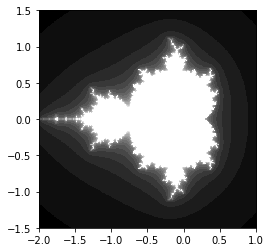

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis, zeros, empty

def compute_mandelbrot(N_max, some_threshold, nx, ny):
# A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)
    c = x[:,newaxis] + 1j*y[newaxis,:]
    isMandelbrot = zeros((nx,ny), bool)
    mandelbrotValues = zeros((nx,ny), int)
    isMandelbrot[:,:] = True

# Mandelbrot iteration
    z = c
    for t in range(N_max):
        z = z**2 + c
        for i in range(nx):
            for j in range(ny):
                if abs(z[i,j]) > some_threshold and  isMandelbrot[i,j]:
                    mandelbrotValues[i,j] = t
                    isMandelbrot[i,j] = False
    for i in range(nx):
        for j in range(ny):
            if isMandelbrot[i,j]:
                mandelbrotValues[i,j] = N_max

    return mandelbrotValues

mandelbrot_set = compute_mandelbrot(20, 200., 601, 401)
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.show()